In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#! unzip "/content/gdrive/My Drive/bengaliai-cv19.zip" -d "/content/gdrive/My Drive/bengazi"

In [0]:
!pip install -U pandas


     |████████████████████████████████| 10.1MB 3.5MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 1.0.1 which is incompatible.
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


In [0]:
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
from tqdm import tqdm_notebook as tqdm
HEIGHT = 137
WIDTH = 236

In [0]:
from pathlib import Path
ROOT = "/content/gdrive/My Drive/bengazi/"

In [0]:
train_df = pd.read_csv(f'{ROOT}train.csv')
train_df.head()

ImportError: ignored

  image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme
0  Train_0             15                9                    5   ক্ট্রো
1  Train_1            159                0                    0        হ
2  Train_2             22                3                    5     খ্রী
3  Train_3             53                2                    2     র্টি
4  Train_4             71                9                    5     থ্রো

In [0]:
train_df.shape

(200840, 5)

In [0]:
def load_as_npa(file):
    df = pd.read_parquet(file)
    return df.iloc[:, 0], df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH)


def image_from_char(char):
    image = Image.new('RGB', (128, 128))
    draw = ImageDraw.Draw(image)
    size = 64 // len(char) + 32
    myfont = ImageFont.truetype(f'{ROOT}fonts/kalpurush-2.ttf', size)
    w, h = draw.textsize(str(char), font=myfont)
    draw.text(((128 - w) / 2,(128 - h) / 2), str(char), font=myfont)

    return np.array(image)[:,:,0]

ক্ট্রো


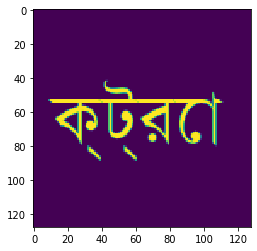

In [0]:
char = train_df.iloc[0,4]
print(char)
plt.imshow(image_from_char(char));

In [0]:
char.shape

AttributeError: ignored

In [0]:
fonts = os.listdir(f'{ROOT}fonts/')
fonts

['HindSiliguri-Light.ttf',
 'hind_siliguri_normal_500.ttf',
 'Arjun Normal.ttf',
 'kalpurush-2.ttf']

In [0]:
train_df.grapheme.values

array(['ক্ট্রো', 'হ', 'খ্রী', ..., 'অ্যা', 'স্নো', 'ল্টি'], dtype=object)

In [0]:
start = np.empty((128*128), np.uint8)
for grapheme in tqdm(train_df.grapheme[:]):
    size = 64 // len(grapheme) + 32
    im = np.array(image_from_char(grapheme))
    start = np.vstack((start, im.ravel()))
    
out = pd.concat([train_df.image_id, pd.DataFrame(start[1:,:])], 1)
out.columns = ['image_id'] + [str(i) for i in out.columns[1:]]
out.to_parquet(f'{ROOT}128_kalpurush_{fname}')

KeyboardInterrupt: ignored

In [0]:
v = train_df.grapheme.apply(lambda x:  image_from_char(x), 1 )

In [0]:
plt.imshow(v[1].reshape(128,128))

NameError: ignored

In [0]:
np.save(f'{ROOT}128_font', np.array(v))

In [0]:
f = np.load(f'{ROOT}128_font.npy', allow_pickle=True)

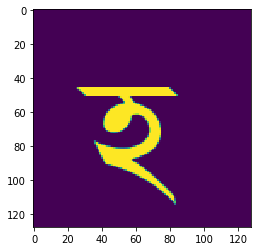

In [0]:
plt.imshow(f[1].reshape(128,128))